In [5]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
object_number = 5

In [6]:
# Paths
backgrounds_folder = "../GenerationData/Backgrounds"
objects_folder = "../GenerationData/Objects"

# Load file paths
backgrounds = [os.path.join(backgrounds_folder, f) for f in os.listdir(backgrounds_folder)
               if f.lower().endswith((".png", ".jpg", ".jpeg"))]
objects = [os.path.join(objects_folder, f) for f in os.listdir(objects_folder)
           if f.lower().endswith((".png", ".jpg", ".jpeg"))]

In [14]:
# Pick one random background
bg_path = random.choice(backgrounds)
background = Image.open(bg_path).convert("RGBA")

# Create a blank black mask
mask = Image.new("L", background.size, 0)

# Random number of objects
num_objects = random.randint(1, object_number)
chosen_objects = random.sample(objects, num_objects)

In [ ]:
occupied = []
def check_overlap(new_rect, occupied_rects):
    """Check if new_rect overlaps any existing rectangles"""
    x1, y1, x2, y2 = new_rect
    for ox1, oy1, ox2, oy2 in occupied_rects:
        # Check for rectangle overlap
        if not (x2 <= ox1 or x1 >= ox2 or y2 <= oy1 or y1 >= oy2):
            return True
    return False

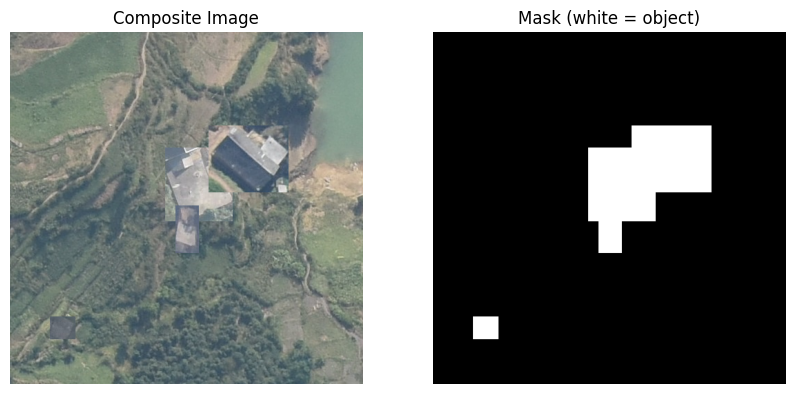

In [15]:
for obj_path in chosen_objects:
    obj = Image.open(obj_path).convert("RGBA")

    # Random position within background
    max_x = background.width - obj.width
    max_y = background.height - obj.height
    pos = (random.randint(0, max_x), random.randint(0, max_y))

    # Paste object onto background
    background.alpha_composite(obj, pos)

    # Update mask (white = object area)
    obj_mask = obj.split()[-1]  # alpha channel
    mask.paste(obj_mask, pos, obj_mask)

# Convert for plotting
composite_rgb = background.convert("RGB")

# Plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(composite_rgb)
axs[0].set_title("Composite Image")
axs[0].axis("off")

axs[1].imshow(mask, cmap="gray")
axs[1].set_title("Mask (white = object)")
axs[1].axis("off")

plt.show()
